In [11]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
import datetime
from astropy.io import fits


import sys
sys.path.insert(1, '/Users/nityaravi/Documents/GitHub/MaNGA-VelMap/vel_model/')

from vel_model_cython import rot_fit_BB, rot_fit_BB_loop


In [12]:
## get master_table
master_table = Table.read('/Users/nityaravi/Documents/Research/RotationCurves/data/manga/output_files/DR17/CURRENT_MASTER_TABLE/Elliptical_sphdisk_refitspirals_BPT_v9.fits')
master_table[:5]

plate,ifudsgn,plateifu,mangaid,versdrp2,versdrp3,verscore,versutil,versprim,platetyp,srvymode,objra,objdec,ifuglon,ifuglat,ifura,ifudec,ebvgal,nexp,exptime,drp3qual,bluesn2,redsn2,harname,frlplug,cartid,designid,cenra,cendec,airmsmin,airmsmed,airmsmax,seemin,seemed,seemax,transmin,transmed,transmax,mjdmin,mjdmed,mjdmax,gfwhm,rfwhm,ifwhm,zfwhm,mngtarg1,mngtarg2,mngtarg3,catidnum,plttarg,manga_tileid,nsa_iauname,ifudesignsize,ifutargetsize,ifudesignwrongsize,z,zmin,zmax,szmin,szmax,ezmin,ezmax,probs,pweight,psweight,psrweight,sweight,srweight,eweight,esweight,esrweight,nsa_field,nsa_run,nsa_camcol,nsa_version,nsa_nsaid,nsa_nsaid_v1b,nsa_z,nsa_zdist,nsa_sersic_absmag,nsa_elpetro_absmag,nsa_elpetro_amivar,nsa_sersic_mass,nsa_elpetro_mass,nsa_elpetro_ba,nsa_elpetro_phi,nsa_extinction,nsa_elpetro_th50_r,nsa_petro_th50,nsa_petro_flux,nsa_petro_flux_ivar,nsa_elpetro_flux,nsa_elpetro_flux_ivar,nsa_sersic_ba,nsa_sersic_n,nsa_sersic_phi,nsa_sersic_th50,nsa_sersic_flux,nsa_sersic_flux_ivar,smoothness_score,nsa_elpetro_th90,v_sys,v_sys_err,ba,ba_err,x0,x0_err,y0,y0_err,phi,phi_err,v_max,v_max_err,r_turn,r_turn_err,chi2,alpha,alpha_err,Rmax,M,M_err,fit_flag,Sigma_disk,Sigma_disk_err,R_disk,R_disk_err,rho_bulge,rho_bulge_err,R_bulge,R_bulge_err,M90_disk,M90_disk_err,M_disk,M_disk_err,chi2_disk,WF50,WF50_err,DL_ttype,vis_tidal,b,b_err,M_R90,M_R90_err,fit_function,A_g,A_r,logH2,R90_kpc,v_3p5,v_3p5_err,NSA_plate,NSA_fiberID,NSA_MJD,logH2_CG,logH2_CG_err,logH2_M,Z,Z_err,M_Z,M_Z_err,grad_Z,grad_Z_err,Z_0,Z_0_err,SFR,sSFR,SFR_err,sSFR_err,Flux_OII_3726,Flux_OII_3726_Err,Flux_OII_3728,Flux_OII_3728_Err,Flux_OIII_4958,Flux_OIII_4958_Err,Flux_OIII_5006,Flux_OIII_5006_Err,Flux_NII_6547,Flux_NII_6547_Err,Flux_NII_6583,Flux_NII_6583_Err,Flux_Ha_6562,Flux_Ha_6562_Err,Flux_Hb_4861,Flux_Hb_4861_Err,CMD_class,rabsmag_NSA,param_H2,param_H2_err,Z_map,Z_err_map,M_Z_map,M_Z_err_map,logHI_R90,Mvir,Mvir_err,star_sigma,star_sigma_err,dipole_moment,Rgal,vflag_VF,nsa_elpetro_log_mass,rabsmag,param_H2_R90,logHe,sphd_rho_c,sphd_rho_c_err,sphd_R_scale,sphd_R_scale_err,sphd_Sigma_d,sphd_Sigma_d_err,sphd_R_d,sphd_R_d_err,sphd_M_star,sphd_M_star_err,sphd_chi2,mhq_R_scale,mhq_R_scale_err,mhq_M_star,mhq_M_star_err,mhq_gamma,mhq_gamma_err,mhq_chi2,hq_R_scale,hq_R_scale_err,hq_M_star,hq_M_star_err,hq_chi2,sph_rho_c,sph_rho_c_err,sph_R_scale,sph_R_scale_err,sph_M_star,sph_M_star_err,sph_chi2,sum_M_star,sum_M_star_err,BPT_class,spiral_mask,elliptical_mask,Age_LW_Re_fit,Age_MW_Re_fit,ZH_LW_Re_fit,ZH_MW_Re_fit,M90_disk_h,M90_disk_err_h,sphd_M_star_err_h,sphd_M_star_h,V_R90,V_R90_err,e_M_star_R90,e_M_star_R90_err,e_M_star_R90_h,e_M_star_R90_err_h,v_eff,v_eff_err,logHI,logHI_err,HI_catalog,logHI_h,logHI_err_h
int64,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,float64,float64,float64,float64,float64,float64,float64,int64,float64,int64,float64,float64,bytes53,int64,bytes32,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,float64,float64,float64,float64,int64,int64,int64,int64,bytes32,int64,bytes19,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,bytes6,int64,int64,float64,float64,float64[7],float64[7],float64[7],float64,float64,float64,float64,float64[7],float64,float64,float64[7],float64[7],float64[7],float64[7],float64,float64,float64,float64,float64[7],float64[7],float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,floa

In [13]:
test_gal = '8997-9102'
idx = np.where(master_table['plateifu'] == test_gal)[0][0]
r90 = master_table['R90_kpc'][idx]
vmax = master_table['v_max'][idx]
rturn = master_table['r_turn'][idx]
alpha = master_table['alpha'][idx]

In [14]:
def vel_BB(r, params):

    vmax, rturn, alpha = params

    v = vmax * r / (rturn**alpha + r**alpha)**(1/alpha)

    return v*np.sign(r)

In [47]:
# data points
rs = np.linspace(-r90, r90, 4000)

In [48]:
# run python version of function
START = datetime.datetime.now()
v_p = vel_BB(rs, [vmax, rturn, alpha])
python_time = datetime.datetime.now() - START
print('time elapsed: ', python_time)

time elapsed:  0:00:00.002768


/var/folders/4q/zk1xkb454t7_ncsh3pf51p700000gp/T/ipykernel_81543/751527715.py:5: RuntimeWarning: invalid value encountered in power
  v = vmax * r / (rturn**alpha + r**alpha)**(1/alpha)


In [49]:
# c version of function with loop in python
v_c = np.zeros(len(rs))

START = datetime.datetime.now()
for i in range(len(rs)):
    v_c[i] = rot_fit_BB(rs[i], [vmax, rturn, alpha])
c_time = datetime.datetime.now() - START
print('time elapsed: ', c_time)

time elapsed:  0:00:00.005785


In [50]:
# c version with loop in c

START = datetime.datetime.now()
v_c_l = rot_fit_BB_loop(rs, [vmax,rturn,alpha])
cl_time = datetime.datetime.now() - START

print('time elapsed: ', cl_time)

time elapsed:  0:00:00.000771


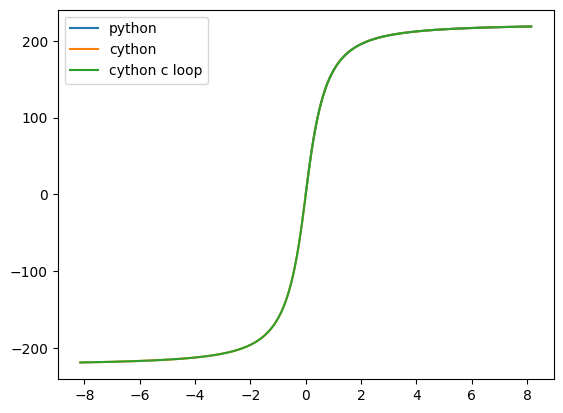

In [9]:
plt.plot(rs, v_p, label='python')
plt.plot(rs, v_c, label='cython')
plt.plot(rs, v_c_l, label='cython c loop')
plt.legend()